<a href="https://colab.research.google.com/github/vishnu9358862212/AIML-EXP/blob/main/EXPERIMENT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving export.csv to export.csv


In [2]:
import io
df=pd.read_csv(io.BytesIO(uploaded['export.csv']))

In [3]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [5]:
from sklearn.preprocessing import StandardScaler

# Extract numerical columns for clustering
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_data.columns)


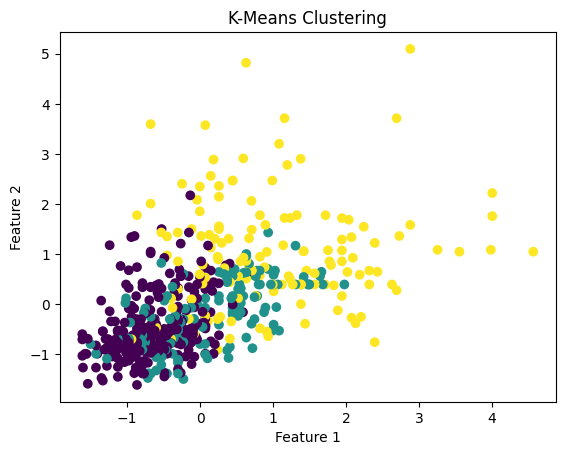

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Update n_clusters as needed
kmeans_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
scaled_df['Cluster'] = kmeans_labels

# Visualize clusters
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


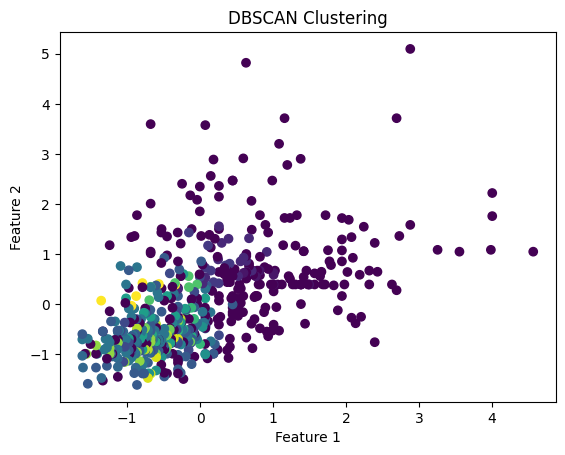

In [7]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Update parameters based on dataset
dbscan_labels = dbscan.fit_predict(scaled_df)

# Add cluster labels to the DataFrame
scaled_df['DBSCAN_Cluster'] = dbscan_labels

# Visualize clusters
plt.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate for K-Means (example)
silhouette = silhouette_score(scaled_df.iloc[:, :-1], kmeans_labels)
davies_bouldin = davies_bouldin_score(scaled_df.iloc[:, :-1], kmeans_labels)

print(f"K-Means Silhouette Score: {silhouette}")
print(f"K-Means Davies-Bouldin Index: {davies_bouldin}")


K-Means Silhouette Score: 0.2920512671127979
K-Means Davies-Bouldin Index: 1.6140311194771708
